# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind_from_stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__  

_It is clear from the histogram that this sample of charges is very skewed to the right. While half of the sampled observations are below the mean of \\$13,270, the other half have a much larger spread, from \\$13,270 to over \\$60,000. These larger observations pull the mean higher and away from the median, as well as increase the standard deviation to include this lopsided spread. This increases the uncertainty in the statistics we derive from this sample._

In [4]:
mean_charge = np.mean(medical['charges'])
sd_charge = np.std(medical['charges'])
print(f'Mean: {round(mean_charge,2)}') 
print(f'SD: {round(sd_charge,2)}')

Mean: 13270.42
SD: 12105.48


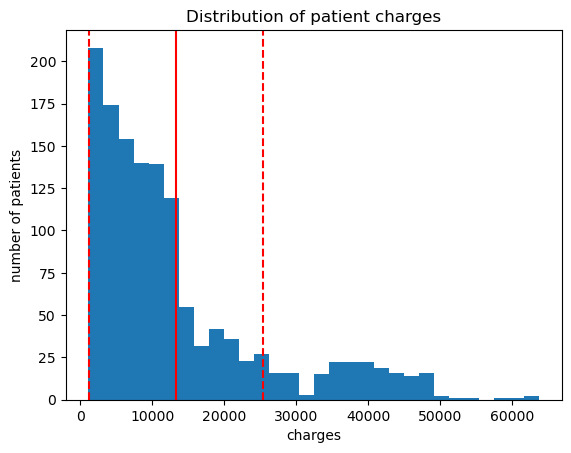

In [5]:
_ = plt.hist(medical['charges'], bins=30)
_ = plt.xlabel('charges')
_ = plt.ylabel('number of patients')
_ = plt.title('Distribution of patient charges')
_ = plt.axvline(mean_charge, color='r')
_ = plt.axvline(mean_charge + sd_charge, color='r', linestyle='--')
_ = plt.axvline(mean_charge - sd_charge, color='r', linestyle='--')
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

_Despite this sample not following a normal distribution, the central limit theorem tells us that the distribution of sample means is normally distributed, and the standard deviation of the means become more narrow with larger sample sizes. Since this sample is large with over 1300 observations, we can use the sample data as an approporiate proxy for the population.  Moreover, the t-distribution is the appropriate frequency test because we do not know the population standard deviation._


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

_A one-sided test is appropriate here because the administrator's concern is only whether the actual mean charge is under \\$12,000. Therefore, we are not concerned about the upper/larger tail values._

_The critical value at the 95% confidence interval is \\$12,725, which is higher than the threshold established by the administrator. It would be a rare occurance for the mean to be below \\$12,000 based on the data we are using, and therefore there should not be much concern that the actual average charge is below that amount._

In [6]:
# calulate t-score
t_score = t.ppf(0.05, len(medical) - 1)
st_error = sd_charge/np.sqrt(len(medical))

In [7]:
critical_val = mean_charge + (t_score*st_error)
critical_val

12725.690859802164

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 

_The null hypothesis (H0) is that there is no difference between mean charges for patients without insurance compared to those with insurance. The alternative hypthesis (H1) is there is a difference in the expected values between the two groups. We are assuming that the variance is equal between the two groups._

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [8]:
# group_0 do not have insurance and group_1 does have insurance.
group_0 = medical[medical['insuranceclaim'] == 0]
group_1 = medical[medical['insuranceclaim'] == 1]

n0, n1 = len(group_0), len(group_1)
mean0, mean1 = np.mean(group_0['charges']), np.mean(group_1['charges'])
var0, var1 = np.var(group_0['charges'], ddof=1), np.var(group_1['charges'], ddof=1)

# t-test manual calculation
sd_pool = np.sqrt(((n0 - 1)*var0 + (n1 - 1)*var1) / (n0 + n1 - 2))

t_pool = (mean0 - mean1) / (sd_pool*np.sqrt(n0**-1 + n1**-1)) 
t_pool

-11.893299030876715

In [9]:
# do not need to subtract from 1 because negative t-stat indicates left tail on the cdf. 
p_pool = 2 * t.cdf(t_pool, n0 + n1 - 2)
p_pool

4.4612302316205886e-31

In [10]:
# t-test using scipy.stats 
# added ttest_ind_from_stats to imports at the beginning
t_sp, p_sp = ttest_ind_from_stats(mean0, np.sqrt(var0), n0, mean1, np.sqrt(var1), n1)

t_sp, p_sp

(-11.893299030876715, 4.4612302316205886e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ 

_There does not appear to be an equivilant z-test function. Since a z-test assumes the population standard deviation is known and is based on the normal curve, the calculation can be simplified and used with norm.cdf_

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test